(65, 571)


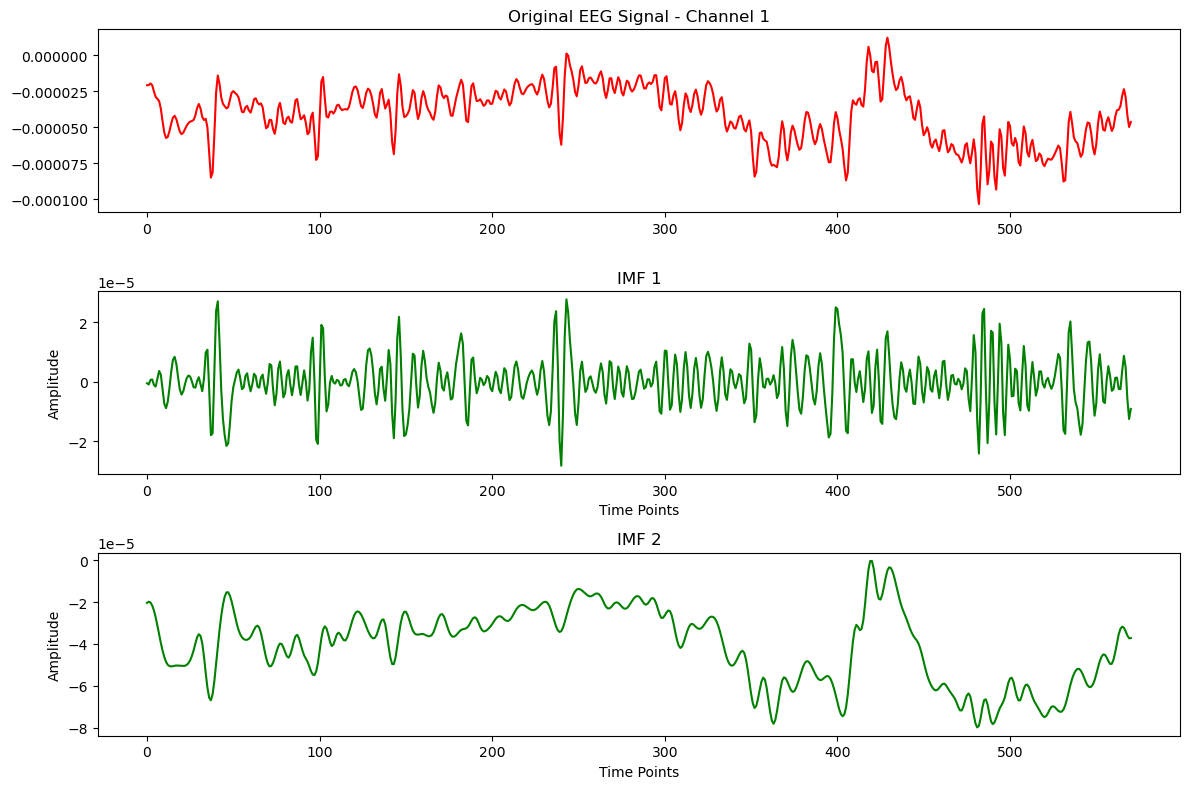

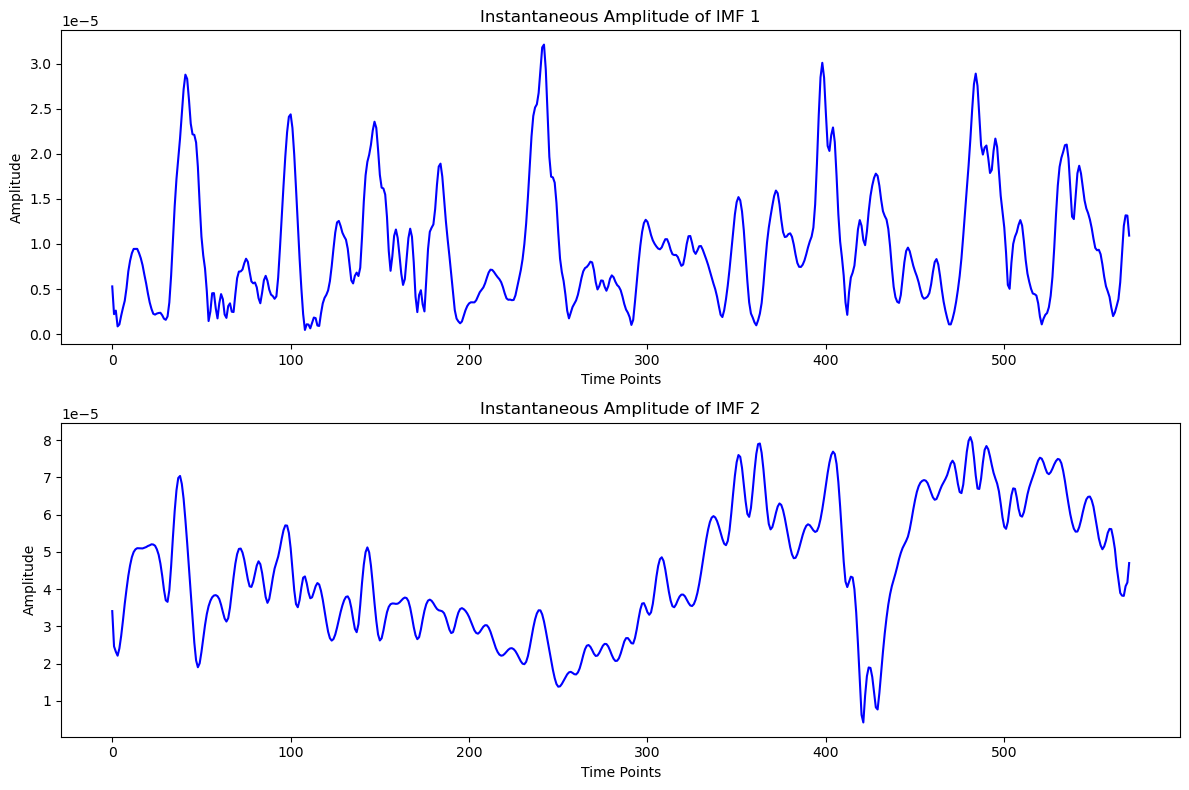

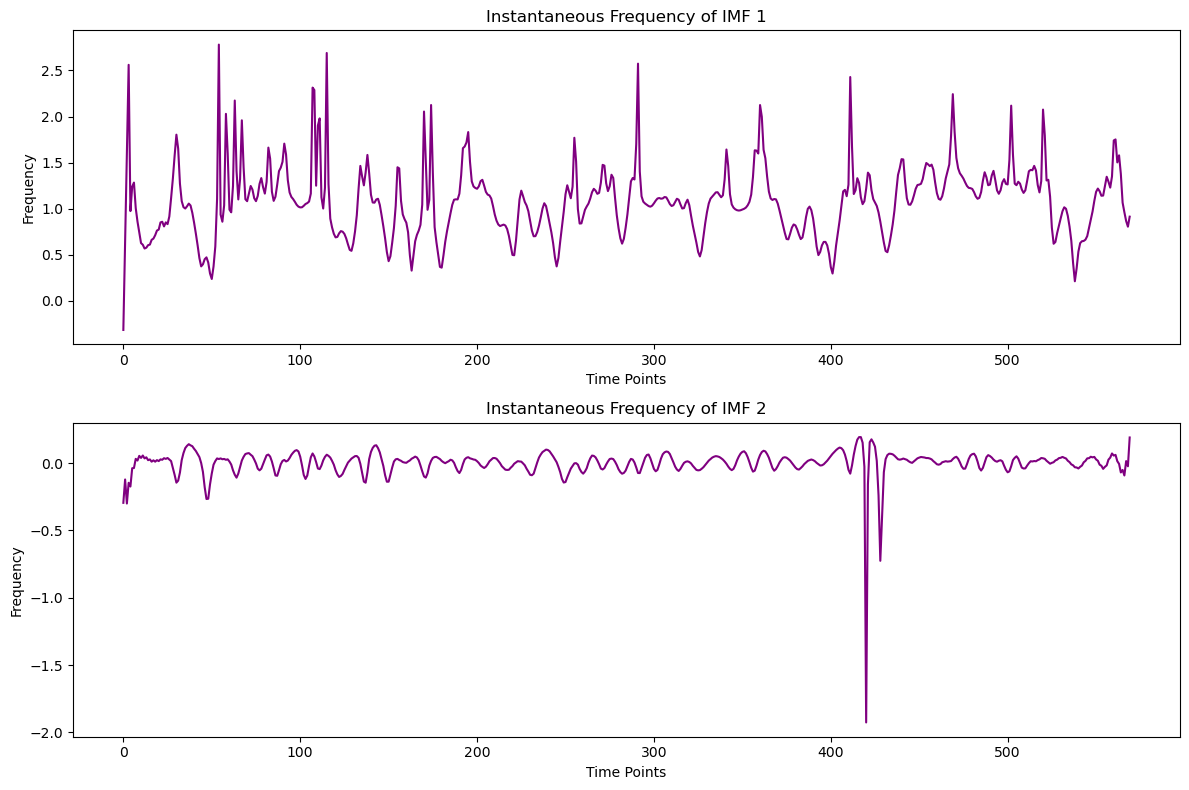

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PyEMD import EMD
from scipy.signal import hilbert
import pickle

# Load EEG data
with open(r'C:\Users\User\Documents\Lie detect data\7M_EEGData\eeg_quer_lie_6.pkl', 'rb') as file:
    eeg_data = pickle.load(file)

# Convert the data to NumPy array
if isinstance(eeg_data, pd.DataFrame):
    eeg_data = eeg_data.to_numpy()
elif isinstance(eeg_data, list):
    eeg_data = np.array(eeg_data)

# Print the data shape to check whether data changed properly to NumPy.
print(eeg_data.shape) 

# Select a single channel for demonstaration
channel_data = eeg_data[0]

# Apply EMD to decompose the signal
emd = EMD()
imfs = emd(channel_data)

# Plot the original signal and the extracted IMFs
plt.figure(figsize=(12,8))
plt.subplot(len(imfs) + 1, 1, 1)
plt.plot(channel_data, 'r')
plt.title('Original EEG Signal - Channel 1')
for i, imf in enumerate(imfs):
    plt.subplot(len(imfs) + 1, 1, i + 2)
    plt.plot(imf, 'g')
    plt.title(f'IMF {i + 1}')
    plt.xlabel('Time Points')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.savefig(r'C:\Users\User\Documents\Lie detect data\imfs_plot.png')
plt.show()

# Apply Hilbert Transform to each IMF
hilbert_transforms = [hilbert(imf) for imf in imfs]
instantaneous_amplitudes = [np.abs(ht) for ht in hilbert_transforms]
instantaneous_frequencies = [np.diff(np.unwrap(np.angle(ht))) for ht in hilbert_transforms]

# Plotting Instantaneous Amplitude
plt.figure(figsize=(12,8))
for i, amp in enumerate(instantaneous_amplitudes):
    plt.subplot(len(instantaneous_amplitudes), 1, i + 1)
    plt.plot(amp, 'b')
    plt.title(f'Instantaneous Amplitude of IMF {i + 1}')
    plt.xlabel('Time Points')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.savefig(r'C:\Users\User\Documents\Lie detect data\amplitudes_plot.png')
plt.show()

# Plotting Instantaneous Frequency
plt.figure(figsize=(12,8))
for i, freq in enumerate(instantaneous_frequencies):
    plt.subplot(len(instantaneous_frequencies), 1, i + 1)
    plt.plot(freq, 'purple')
    plt.title(f'Instantaneous Frequency of IMF {i + 1}')
    plt.xlabel('Time Points')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig(r'C:\Users\User\Documents\Lie detect data\frequencies_plot.png')
plt.show()